### Задача: на основе данных выявить поведенчиские шаблоны пьющих и непьющих студентов, можно делать в Jupyter notebook

Набор данных: https://archive.ics.uci.edu/ml/datasets/student+performance

[Анализ и предобработка набора данных](#%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%BD%D0%B0%D0%B1%D0%BE%D1%80%D0%B0-%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)

[Вывод 1](#%D0%92%D1%8B%D0%B2%D0%BE%D0%B4-1)

[Вывод 2](#%D0%92%D1%8B%D0%B2%D0%BE%D0%B4-2)

[Обучение моделей и тестирование](#%D0%A3%D1%87%D0%B8%D0%BC-%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8-%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F%D1%82%D1%8C-%D0%BF%D1%8C%D1%8E%D1%89%D0%B8%D1%85-%D0%B8-%D1%82%D1%80%D0%B5%D0%B7%D0%B2%D0%B5%D0%BD%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2)

In [1]:
import pandas as pd
import numpy as np

#### Читаем файлы

```
# %load stud_data/student.txt

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.
```

In [2]:
df1 = pd.read_csv('stud_data/student-mat.csv', sep=';')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [3]:
df2 = pd.read_csv('stud_data/student-por.csv', sep = ';')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

### Анализ набора данных

#### В описании к данным указано, что некоторые студенты (382 студента) посещали обе группы, а так же указан набор полей, формирующих уникальную характристику студента. Будем их использовать для исключения из общего списка студентов, которые ходят на оба курса, что избавит от дублирования основных характеристик.

In [4]:
mf = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

#### В списке курса по математике определяем индексы студентов, посещающих курсы португальского языка. 

#### В процессе слияния была выявлена ошибка в описаниии набора данных. Набор колонок, указанных в файле student-merge.R, не формирует уникальную характристику студента. В примере ниже видно, что формирующие уникальность поля совпадают, а остальные разнятся.

In [5]:
df1_ind = df1.merge(df2, how='inner', on=mf, right_index=True)
df1_ind.tail(4)[1::-1].T

,389,389
school,MS,MS
sex,F,F
age,18,18
address,U,U
famsize,GT3,GT3
Pstatus,T,T
Medu,1,1
Fedu,1,1
Mjob,other,other
Fjob,other,other


In [6]:
# определяем индексы студентов обоих курсов
stud_all_cources = df1.merge(df2, how='inner', on=mf, right_index=True).index

# удаляем повторяющиеся индексы
stud_all_cources = stud_all_cources.drop_duplicates() 

df1_uniq_stud = df1.drop(stud_all_cources)
df1_uniq_stud.index

# df1_ind.loc[df1_ind.duplicated()]

Int64Index([128, 161, 162, 163, 165, 292, 304, 305, 307, 309, 310, 311, 312,
            313, 314, 315, 336, 340, 360, 361, 370, 376, 390, 392, 394],
           dtype='int64')

#### Объединяем уникальные записи студентов в один список.

In [7]:
df = pd.concat([df2, df1_uniq_stud], ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 33 columns):
school        674 non-null object
sex           674 non-null object
age           674 non-null int64
address       674 non-null object
famsize       674 non-null object
Pstatus       674 non-null object
Medu          674 non-null int64
Fedu          674 non-null int64
Mjob          674 non-null object
Fjob          674 non-null object
reason        674 non-null object
guardian      674 non-null object
traveltime    674 non-null int64
studytime     674 non-null int64
failures      674 non-null int64
schoolsup     674 non-null object
famsup        674 non-null object
paid          674 non-null object
activities    674 non-null object
nursery       674 non-null object
higher        674 non-null object
internet      674 non-null object
romantic      674 non-null object
famrel        674 non-null int64
freetime      674 non-null int64
goout         674 non-null int64
Dalc          674 no

#### Считаем пьющими всех, у кого общее потребление алкоголя больше 2 

In [9]:
alco = df[df['Dalc'] + df['Walc'] > 2]
len(alco)

423

In [10]:
no_alco = df[df['Dalc'] + df['Walc'] <= 2]
len(no_alco)

251

In [11]:
# alco = alco.drop(['Dalc', 'Walc'], axis=1)
# no_alco = no_alco.drop(['Dalc', 'Walc'], axis=1)

#### Определяем наиболее часто встречаемые значения характеристик

In [12]:
alco_mff = []
for c in alco.columns:
    alco_mff.append(alco[c].value_counts().idxmax())
alco_mff = pd.DataFrame([alco_mff], columns=alco.columns, index=['alco'])

In [13]:
no_alco_mff = []
for c in no_alco.columns:
    no_alco_mff.append(no_alco[c].value_counts().idxmax())
no_alco_mff = pd.DataFrame([no_alco_mff], columns=no_alco.columns, index=['no_alco'])

#### Наиболее часто встречаемые значения характеристик пьющих и непьющих студентов 

In [14]:
patterns = pd.concat([alco_mff, no_alco_mff])
patterns.T

,alco,no_alco
school,GP,GP
sex,F,F
age,17,16
address,U,U
famsize,GT3,GT3
Pstatus,T,T
Medu,4,2
Fedu,2,2
Mjob,other,other
Fjob,other,other


#### Категоризируем строковые значения. Label Encoding

In [15]:
df_cat = df.copy()

In [16]:
cat_columns = df_cat.select_dtypes(include=['object']).columns 
cat_columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [17]:
for c in cat_columns: # конвертируем все колонки-обьекты в категории
    df_cat[c] = df_cat[c].astype('category')

In [18]:
# сохраним категории
categories = {}
for c in cat_columns:
    categories[c] = [v for v in df_cat[c].cat.categories]

categories

{'Fjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Pstatus': ['A', 'T'],
 'activities': ['no', 'yes'],
 'address': ['R', 'U'],
 'famsize': ['GT3', 'LE3'],
 'famsup': ['no', 'yes'],
 'guardian': ['father', 'mother', 'other'],
 'higher': ['no', 'yes'],
 'internet': ['no', 'yes'],
 'nursery': ['no', 'yes'],
 'paid': ['no', 'yes'],
 'reason': ['course', 'home', 'other', 'reputation'],
 'romantic': ['no', 'yes'],
 'school': ['GP', 'MS'],
 'schoolsup': ['no', 'yes'],
 'sex': ['F', 'M']}

In [19]:
df_cat[cat_columns] = df_cat[cat_columns].apply(lambda x: x.cat.codes) # заменим на категории

In [20]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 33 columns):
school        674 non-null int8
sex           674 non-null int8
age           674 non-null int64
address       674 non-null int8
famsize       674 non-null int8
Pstatus       674 non-null int8
Medu          674 non-null int64
Fedu          674 non-null int64
Mjob          674 non-null int8
Fjob          674 non-null int8
reason        674 non-null int8
guardian      674 non-null int8
traveltime    674 non-null int64
studytime     674 non-null int64
failures      674 non-null int64
schoolsup     674 non-null int8
famsup        674 non-null int8
paid          674 non-null int8
activities    674 non-null int8
nursery       674 non-null int8
higher        674 non-null int8
internet      674 non-null int8
romantic      674 non-null int8
famrel        674 non-null int64
freetime      674 non-null int64
goout         674 non-null int64
Dalc          674 non-null int64
Walc          674 non

In [21]:
df_cat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


#### Отобразим корреляцию между переменными

In [22]:
corr_data = df_cat.corr()
corr_data.shape

(33, 33)

In [23]:
import matplotlib.pyplot as plt

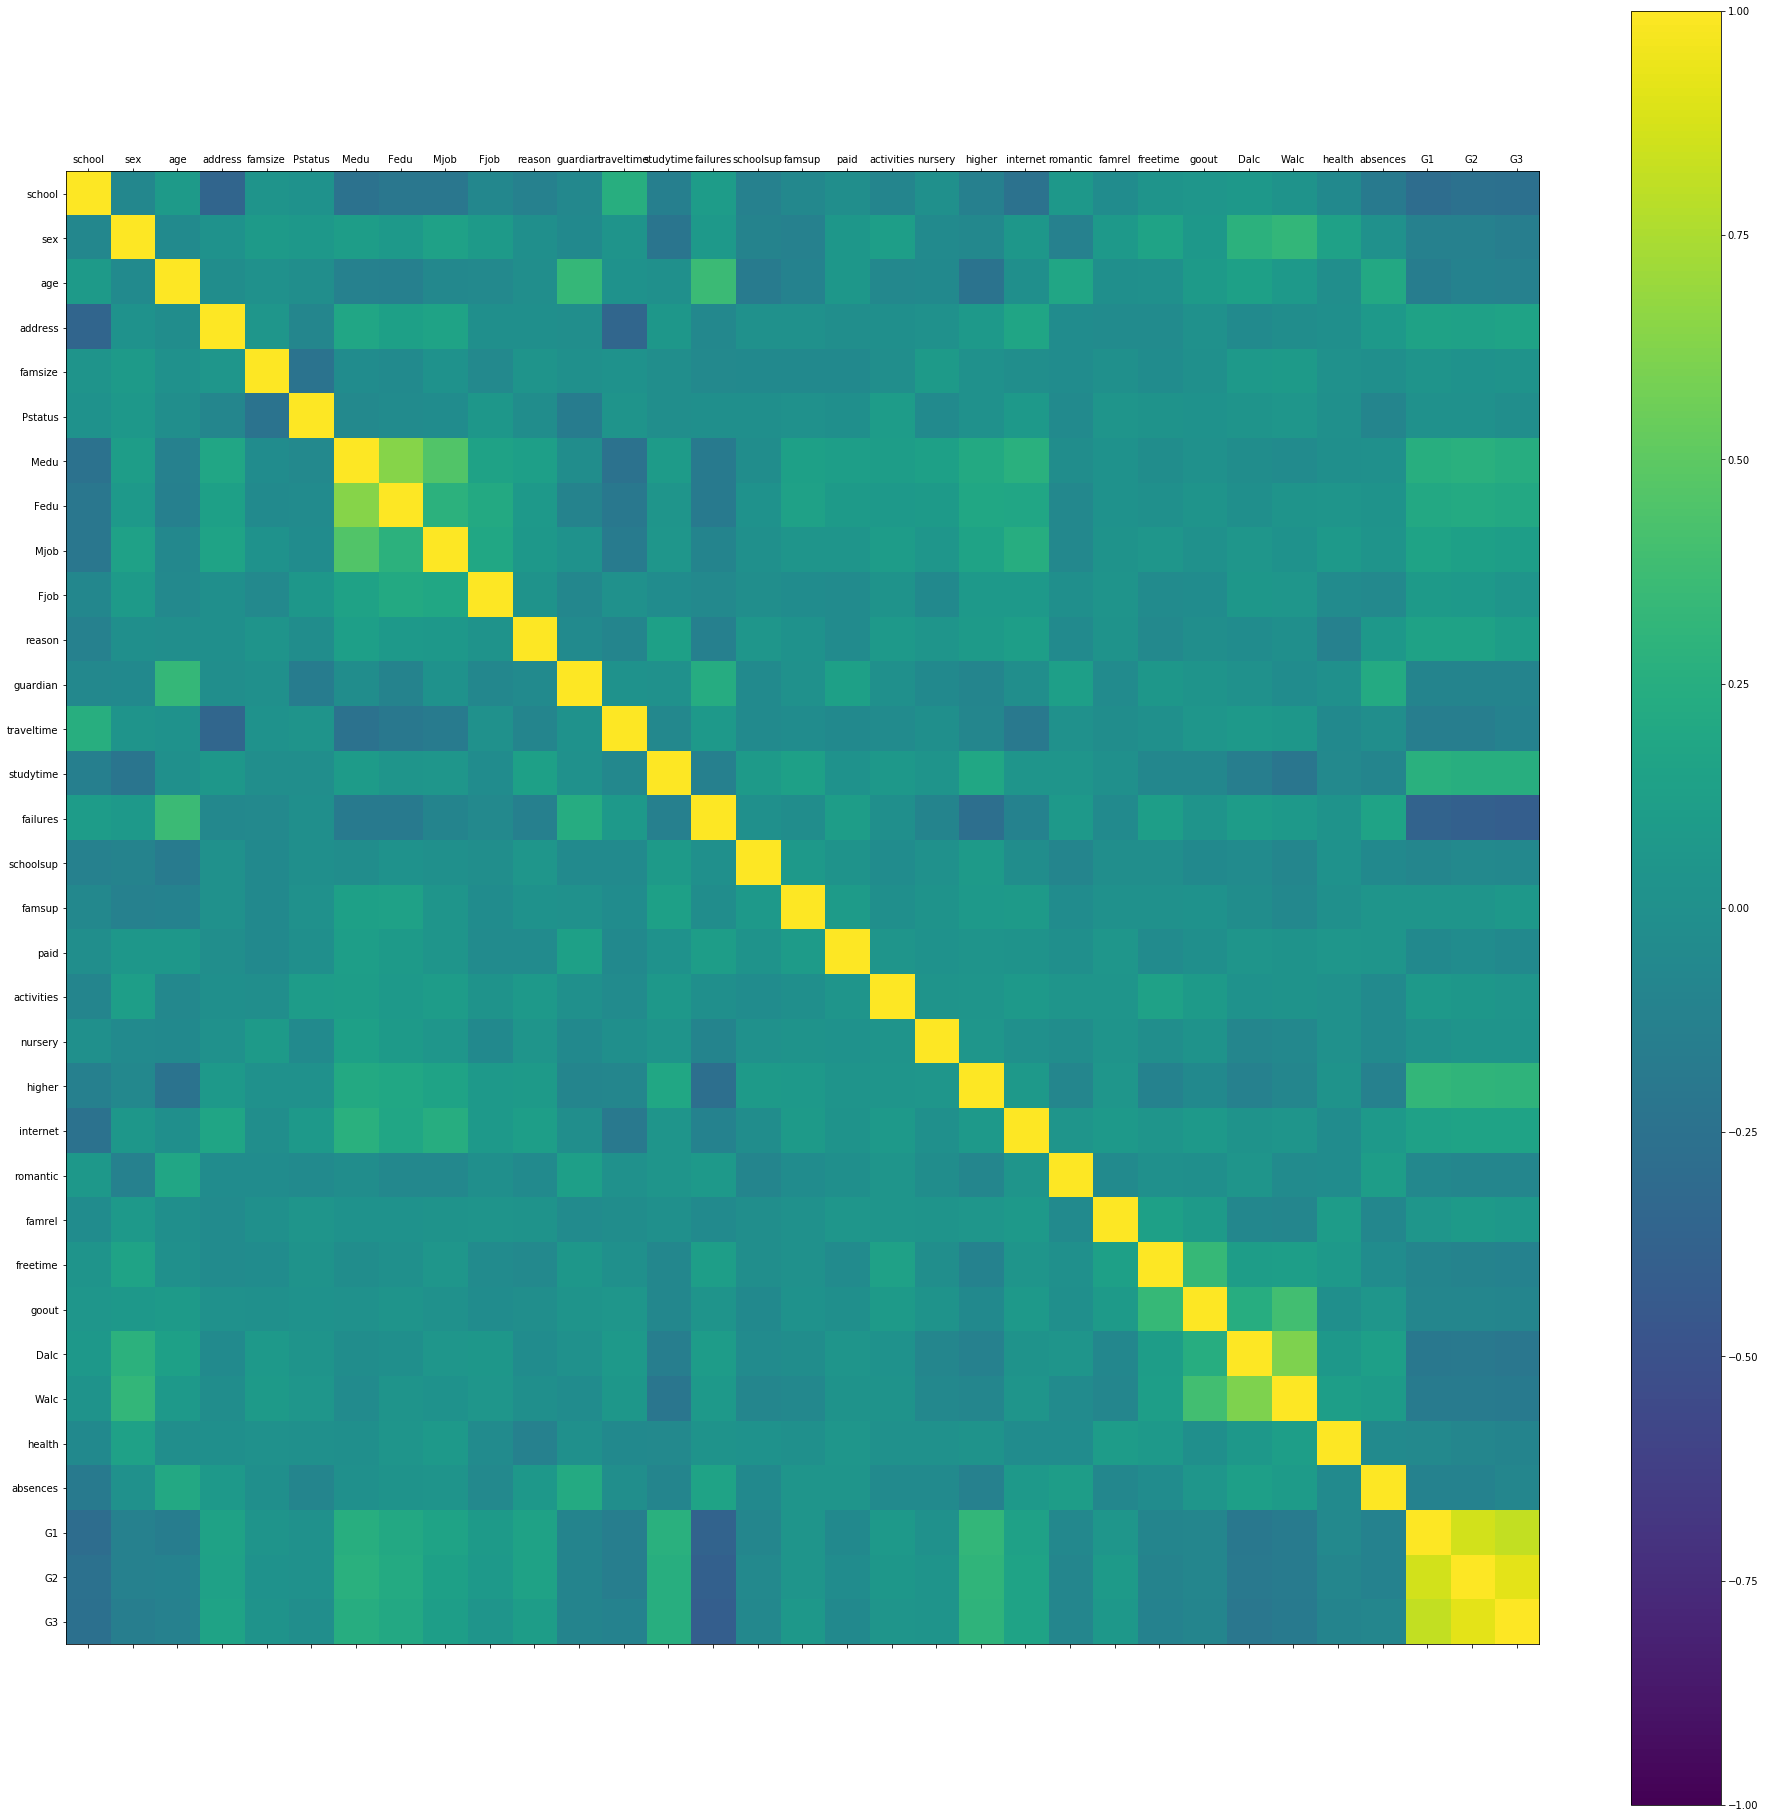

In [24]:
fig = plt.figure(figsize=(33, 33))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 33, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

#### Отобразим максимальную корреляцию

In [25]:
ucd1 = corr_data.unstack()
ucd1 = ucd1[['Dalc', 'Walc']].sort_values(kind="quicksort")
ucd1[ucd1.abs() > 0.13]

Walc  studytime   -0.216135
Dalc  G3          -0.204582
      G1          -0.198557
      G2          -0.191294
Walc  G3          -0.180699
      G2          -0.170814
      G1          -0.166863
Dalc  studytime   -0.141876
      age          0.133358
      goout        0.245031
      sex          0.288280
Walc  sex          0.323179
      goout        0.391986
Dalc  Walc         0.613915
Walc  Dalc         0.613915
      Walc         1.000000
Dalc  Dalc         1.000000
dtype: float64

## Вывод 1
#### Наибольшая положительна корреляция с употредлением алкоголя (Walc, Dalc) наблюдается во взаимодействии с переменными пола ученика, его возраста и проводимым на улице времени. Время обучения имеет отрицательную кореляцию, как и результат на экзаменах. Необходимо уточнение корреляции с употредлением алкоголя конкретного пола студента (one-hot-encoding). [Вывод 2](#%D0%92%D1%8B%D0%B2%D0%BE%D0%B4-2)

#### Создаем One Hot Encoding DataFrame проверки корреляции конкретных значений переменных

In [26]:
df_dummies = pd.get_dummies(df)
df_dummies.shape

(674, 59)

#### Отобразим корреляцию между переменными после преобразования one hot encoding

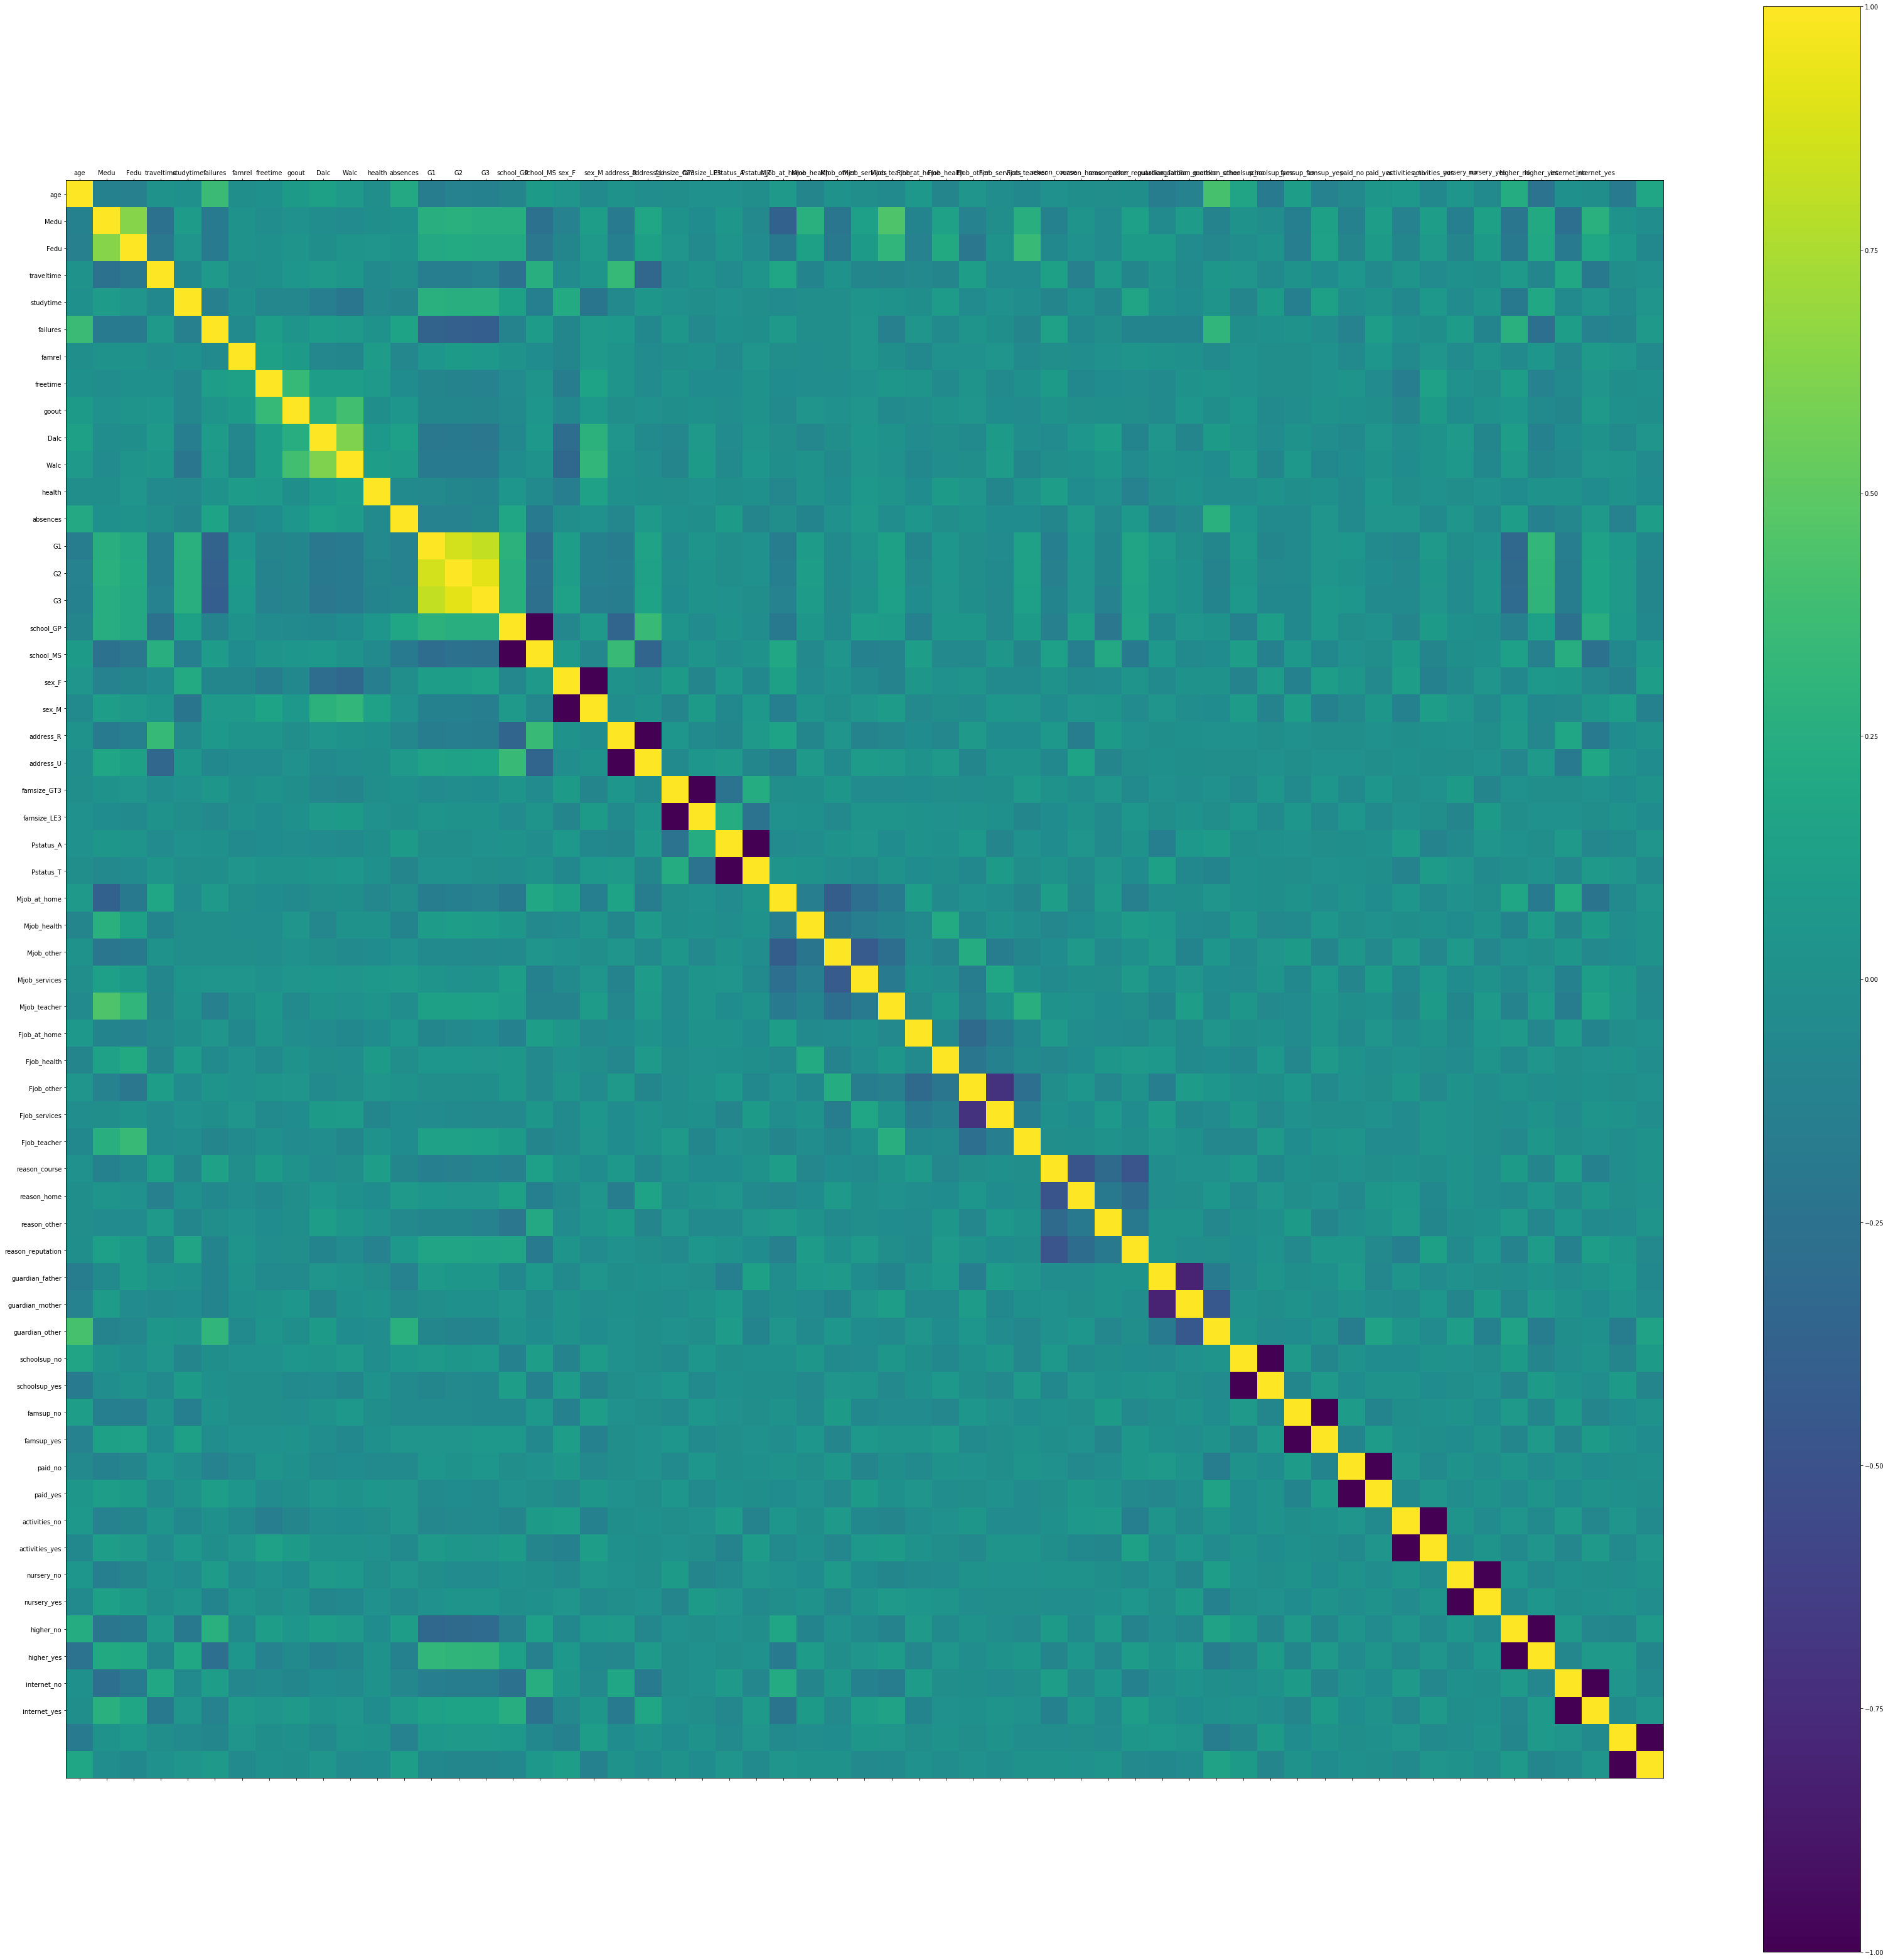

In [27]:
corr_data2 = df_dummies.corr()

fig = plt.figure(figsize=(57, 57))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data2, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 57, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_dummies.columns)
ax.set_yticklabels(df_dummies.columns)
plt.show()

#### Отобразим максимальную корреляцию

In [28]:
ucd2 = corr_data2.unstack()

In [29]:
ucd2 = ucd2[['Dalc', 'Walc']].sort_values(kind="quicksort")
ucd2[ucd2.abs() > 0.13]

Walc  sex_F       -0.323179
Dalc  sex_F       -0.288280
Walc  studytime   -0.216135
Dalc  G3          -0.204582
      G1          -0.198557
      G2          -0.191294
Walc  G3          -0.180699
      G2          -0.170814
      G1          -0.166863
Dalc  studytime   -0.141876
      age          0.133358
      goout        0.245031
      sex_M        0.288280
Walc  sex_M        0.323179
      goout        0.391986
Dalc  Walc         0.613915
Walc  Dalc         0.613915
Dalc  Dalc         1.000000
Walc  Walc         1.000000
dtype: float64

## Вывод 2
#### Больше всего к употреблению алкоголя склонны студенты мужского пола, проводящие на улице много времени.

#### Создаем таргеты. Считаем пьющими всех, у кого общее потребление алкоголя больше 2 

In [30]:
alco_labels = df_cat.apply(lambda x: 1 if x['Dalc'] + x['Walc'] > 2 else 0, axis=1)

#### Создаем Label encoding DataFrame для обучения 

In [31]:
df_cat_to_fit = df_cat.drop(['Dalc', 'Walc'], axis=1)

#### Создаем One Hot Encoding DataFrame для обучения

In [32]:
df_dummies = df_dummies.drop(['Dalc', 'Walc'], axis=1)

### Учим модели определять пьющих и трезвенников
```
Будет произведено обучение на двух наборах данных, с Label Encoding преобразованием и One Hot Encoding.
Нарезка данных будет производиться с помощью train_test_split и KFold
```

### Определяем модели 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

models = [
    (LogisticRegression, dict(penalty='l1')), 
    (tree.DecisionTreeClassifier, dict(max_depth=5)), 
    (RandomForestClassifier, dict(n_estimators=500, max_depth=5, random_state=0)),
    (svm.SVC, dict())
]

### Метрики

In [34]:
from sklearn import metrics

def clf_metrics(y, pred, model_class):
    print('Metrics for model {}: '.format(model_class.__name__),
          '\n'.join(map(str, [
              metrics.f1_score.__name__,
              metrics.f1_score(y, pred),
#               metrics.classification_report.__name__,
#               metrics.classification_report(y, pred),
              metrics.fbeta_score.__name__,
              metrics.fbeta_score(y, pred, 0.5)
          ])),
          sep='\n\n',
          end='\n\n'
          )

### Функции обучения моделей 

In [35]:
def tts_learn(model_class, kwargs):
    model = model_class(**kwargs)
    
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    
    clf_metrics(y_test, model_pred, model_class)

In [36]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

In [37]:
def kf_learn(x, y, model_class, kwargs):
    
    model = model_class(**kwargs)
    
    model_pred_total = y.copy()

    for train_ind, test_ind in kf.split(x):
        model.fit(x.iloc[train_ind], y[train_ind])
        model_pred = model.predict(x.iloc[test_ind])
        model_pred_total[test_ind] = model_pred
    
    clf_metrics(y, model_pred_total, model_class)  

### Обучение моделей на наборе данных с Label Encoding

#### Разбиваем данные на сегменты для обучения и предсказания

In [38]:
from sklearn.model_selection import train_test_split
train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_cat_to_fit,
    alco_labels,
    test_size=0.15,
    random_state=42
)

### Обучаем модели и смотрим метрики

In [39]:
print('Train Test Split cross validation type', end='\n\n')

for model, params in models:
    tts_learn(model, params)

Train Test Split cross validation type

Metrics for model LogisticRegression: 

f1_score
0.716417910448
fbeta_score
0.697674418605

Metrics for model DecisionTreeClassifier: 

f1_score
0.741258741259
fbeta_score
0.697368421053

Metrics for model RandomForestClassifier: 

f1_score
0.718954248366
fbeta_score
0.654761904762

Metrics for model SVC: 

f1_score
0.685314685315
fbeta_score
0.644736842105



In [40]:
print('KFold cross validation type', end='\n\n')

for model, params in models:
    kf_learn(df_cat_to_fit, alco_labels, model, params)

KFold cross validation type

Metrics for model LogisticRegression: 

f1_score
0.77177508269
fbeta_score
0.741839762611

Metrics for model DecisionTreeClassifier: 

f1_score
0.723076923077
fbeta_score
0.693800084353

Metrics for model RandomForestClassifier: 

f1_score
0.768199233716
fbeta_score
0.689714482284

Metrics for model SVC: 

f1_score
0.756701030928
fbeta_score
0.702795863654



### Обучение моделей на наборе данных с One Hot Encoding

#### Разбиваем данные на сегменты для обучения и предсказания

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_dummies,
    alco_labels,
    test_size=0.15,
    random_state=42
)

### Обучаем модели и смотрим метрики

In [42]:
print('Train Test Split cross validation type', end='\n\n')

for model, params in models:
    tts_learn(model, params)

Train Test Split cross validation type

Metrics for model LogisticRegression: 

f1_score
0.666666666667
fbeta_score
0.673076923077

Metrics for model DecisionTreeClassifier: 

f1_score
0.7
fbeta_score
0.665760869565

Metrics for model RandomForestClassifier: 

f1_score
0.746835443038
fbeta_score
0.670454545455

Metrics for model SVC: 

f1_score
0.723404255319
fbeta_score
0.685483870968



In [43]:
print('KFold cross validation type', end='\n\n')

for model, params in models:
    kf_learn(df_dummies, alco_labels, model, params)

KFold cross validation type

Metrics for model LogisticRegression: 

f1_score
0.761589403974
fbeta_score
0.732484076433

Metrics for model DecisionTreeClassifier: 

f1_score
0.72349726776
fbeta_score
0.692179004601

Metrics for model RandomForestClassifier: 

f1_score
0.777566539924
fbeta_score
0.695814903028

Metrics for model SVC: 

f1_score
0.764948453608
fbeta_score
0.710455764075

